In [17]:
%pip install nipype
%pip install nilearn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.man

In [102]:
def load_labels(file):
    fi = open(file, 'rt')
    raw = fi.readlines()
    fi.close()
    label_list = [raw[i].strip() for i in range(0, len(raw),2)]
    label_dict = {i+1: label_list[i] for i in range(len(label_list))}
    return label_dict

def load_confounds(file_list):
    import numpy as np
    confounds = np.genfromtxt(file_list[0], unpack=True)
    for f in file_list[1:]:
        confounds = np.vstack([confounds, np.genfromtxt(f, unpack=True)])
    return confounds.transpose()
labels = load_labels('Template/Atlas/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_label.txt')


In [ ]:
from nilearn.maskers import NiftiLabelsMasker

bold ='/media/abraham/Data/DATA_PREPROCESSED/2025_MSL_ITI_Prisma_DePino/derivatives/spm_preproc_original/sub-01/sub-01_task-mslWithITI_dir-AP_desc-smooth_space-IXI549Space_bold.nii.gz'
atlas = '/home/abraham/Documents/GitHub/NeuroComp2025_TPFinal/Template/Atlas/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_2mm.nii.gz'
rp='/media/abraham/Data/DATA_PREPROCESSED/2025_MSL_ITI_Prisma_DePino/derivatives/spm_preproc_original/sub-01/sub-01_task-mslWithITI_desc-hmc_timeseries.txt'
csf='/media/abraham/Data/DATA_PREPROCESSED/2025_MSL_ITI_Prisma_DePino/derivatives/spm_preproc_original/sub-01/sub-01_task-mslWithITI_desc-csf_timeseries.txt'
wm='/media/abraham/Data/DATA_PREPROCESSED/2025_MSL_ITI_Prisma_DePino/derivatives/spm_preproc_original/sub-01/sub-01_task-mslWithITI_desc-wm_timeseries.txt'

confounds = load_confounds([rp, csf, wm])

masker = NiftiLabelsMasker(labels_img=atlas, standarize=False)

time_series_no_confounds = masker.fit_transform(bold).transpose()
time_series_with_confounds = masker.fit_transform(bold).transpose()

np.float64(-0.5561881123974947)

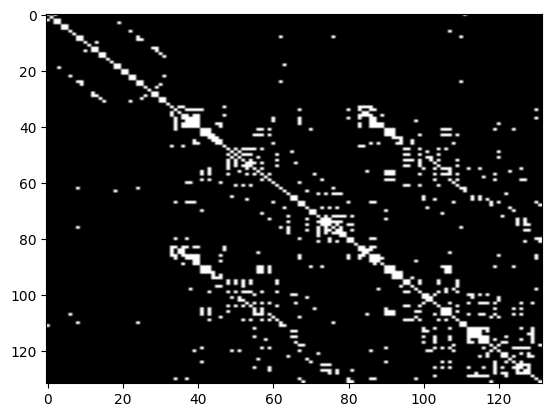

In [124]:
import matplotlib.pyplot as plt
import numpy as np



corr = np.corrcoef(time_series)
plt.imshow(np.abs(corr)>0.5, aspect='auto', cmap='grey')
corr.min()

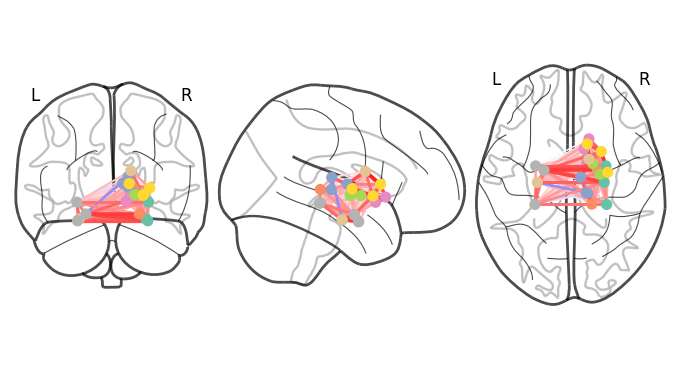

(132, 3)